## METHOD 1

With umbral of : 120 the crack percent is: 3.06


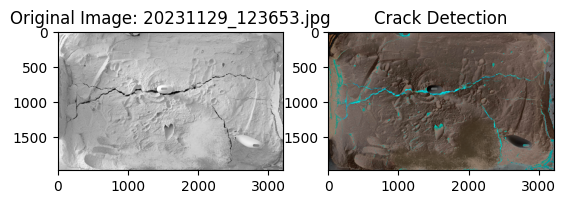

With umbral of : 120 the crack percent is: 2.66


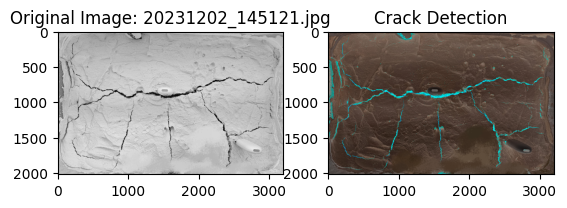

With umbral of : 120 the crack percent is: 9.37


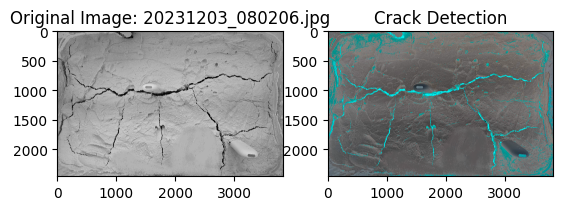

With umbral of : 120 the crack percent is: 16.56


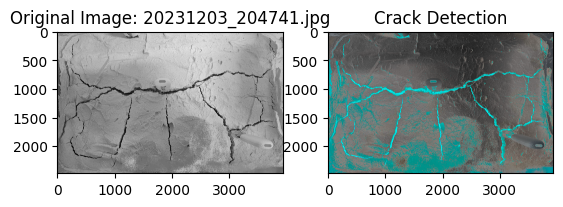

With umbral of : 120 the crack percent is: 4.51


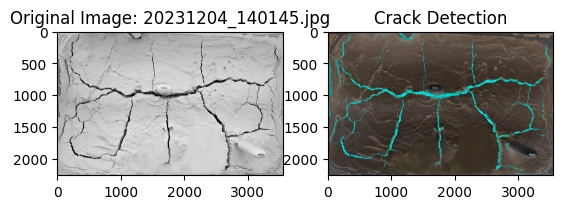

With umbral of : 120 the crack percent is: 21.06


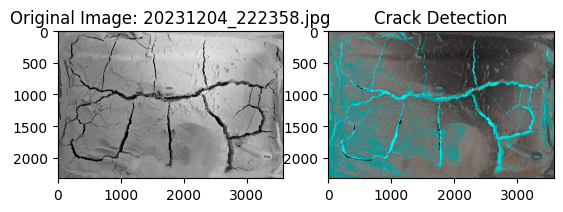

With umbral of : 120 the crack percent is: 18.66


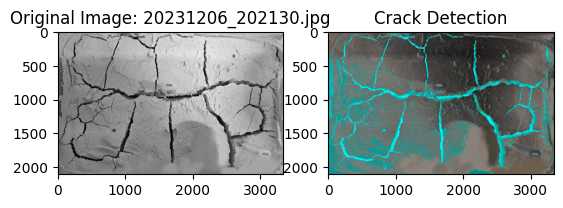

With umbral of : 120 the crack percent is: 8.38


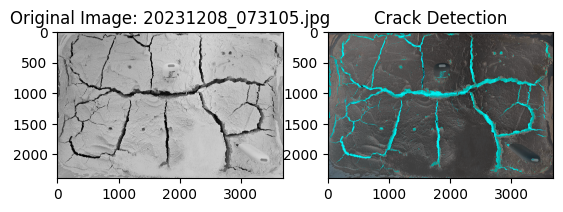

With umbral of : 120 the crack percent is: 28.43


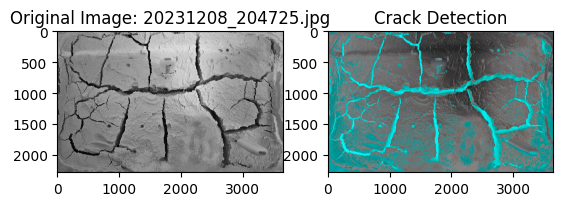

With umbral of : 120 the crack percent is: 15.26


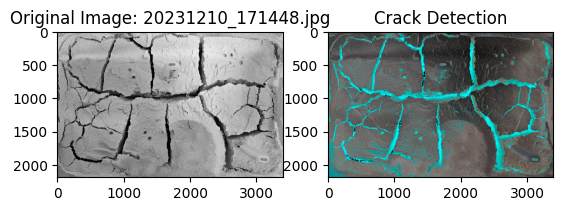

With umbral of : 120 the crack percent is: 10.46


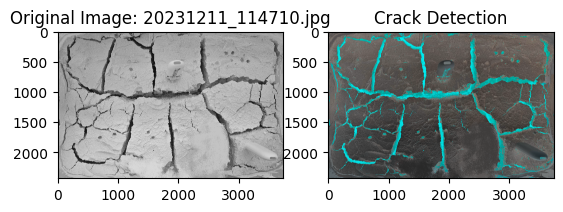

With umbral of : 120 the crack percent is: 15.58


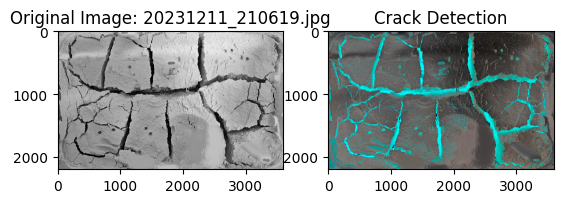

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Folder with images
fold_img = r"D:\EDIFICA\PROYECTOS\Image_proccesing\OneDrive-2024-01-09\Edit"  # Agrega 'r' al principio para tratar la cadena como una cadena cruda

# Files in folder
file_img = os.listdir(fold_img)

for images in file_img:
    # rute
    rute = os.path.join(fold_img, images)
    img = cv2.imread(rute)

    # convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # define umbral
    umbral = 120

    # Bin image
    _, imgBin = cv2.threshold(gray_img, umbral, 255, cv2.THRESH_BINARY)  # Utiliza gray_img en lugar de img

    # size of image
    np_bin = np.asarray(imgBin)
    img_y = np_bin.shape[0]
    img_x = np_bin.shape[1]
    img_z = 1

    crack = 0
    soil = 0
    line_image = np.copy(img) * 255

    for i in range(img_y):
        for j in range(img_x):
            for k in range(img_z):
                if (np_bin[i, j] == 0):  # Elimina la dimensión 'k' ya que la imagen binarizada es en escala de grises
                    crack += 1
                    line_image[i, j, k] = np_bin[i, j]
                else:
                    soil += 1

    percentage = (crack / (soil + crack)) * 100
    print("With umbral of : {:.0f} the crack percent is: {:.2f}".format(umbral, percentage))

    plt.subplot(121), plt.imshow(gray_img, cmap="gray"), plt.title("Original Image: {}".format(images))
    plt.subplot(122), plt.imshow(line_image, cmap="gray"), plt.title("Crack Detection")
    plt.show()

In [3]:
soil

4347217

## METODO 2

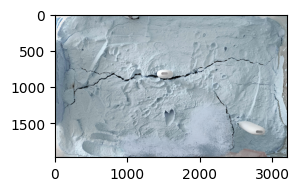

In [10]:
import cv2
import numpy as np
import matplotlib
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt

# load image
img_2 = cv2.imread("20231129_123653.jpg")
# Plot reduced 3x3 image
plt.figure(figsize=(3, 3))
plt.imshow(img_2)
plt.show()

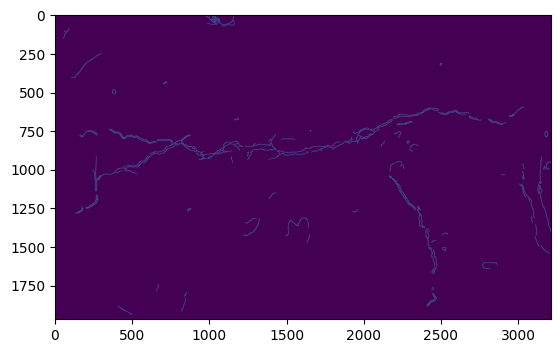

In [22]:
gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
kernel_size = 15
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
#plt.figure(figsize=(3, 3))
plt.imshow(edges)
plt.show()

In [23]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 2  # minimum number of pixels making up a line
max_line_gap = 2  # maximum gap in pixels between connectable line segments
line_image_2 = np.copy(img_2) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image_2,(x1,y1),(x2,y2),(255,0,0),5)

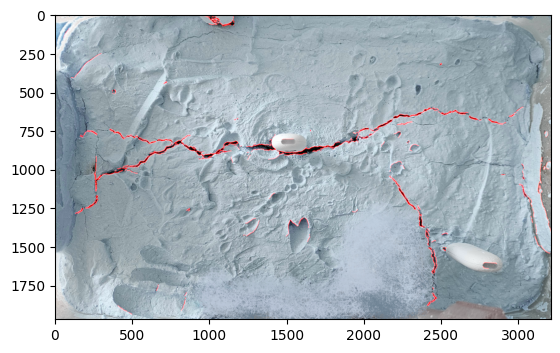

In [174]:
# Draw the lines on the  image
lines_edges = cv2.addWeighted(img_2, 1, line_image_2, 1, 0)
#lines_edges = cv2.addWeighted(img_2, 0.8, line_image_2, 1, 0)
plt.imshow(lines_edges)
plt.show()

In [10]:
np_edges = np.asarray(lines_edges)
np_edges.shape

(939, 1445, 3)

In [11]:
edges_y = np_edges.shape[0]
edges_x = np_edges.shape[1]
edges_z = np_edges.shape[2]

crack_ed = 0
soil_ed = 0

for i in range(edges_y):
    for j in range(edges_x):
        for k in range(edges_z):
            if np_edges[i, j, k] != 0:
                crack_ed += 1
            else:
                soil_ed += 1

In [12]:
crack_ed

205829

In [13]:
soil_ed

3864736

In [15]:
percentage_ed = (crack_ed / soil_ed) * 100
print("Crack percent: {:.2f}".format(percentage_ed))

Crack percent: 5.33
